In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("dataI.csv")
data

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,Andaman and Nicobar,South Andaman,Port Blair,Amaranthus,Amaranthus,04/03/2019,6000,8000,7000
1,Andaman and Nicobar,South Andaman,Port Blair,Banana - Green,Banana - Green,04/03/2019,4500,5500,5000
2,Andaman and Nicobar,South Andaman,Port Blair,Bhindi(Ladies Finger),Bhindi,04/03/2019,6000,8000,7000
3,Andaman and Nicobar,South Andaman,Port Blair,Bitter gourd,Other,04/03/2019,6000,8000,7000
4,Andaman and Nicobar,South Andaman,Port Blair,Black pepper,Other,04/03/2019,110000,130000,120000
...,...,...,...,...,...,...,...,...,...
2233,West Bengal,Uttar Dinajpur,Islampur,Potato,Jyoti,04/03/2019,530,570,550
2234,West Bengal,Uttar Dinajpur,Islampur,Rice,Other,04/03/2019,3550,3650,3600
2235,West Bengal,Uttar Dinajpur,Raiganj,Jute,TD-5,04/03/2019,4400,4600,4500
2236,West Bengal,Uttar Dinajpur,Raiganj,Rice,Other,04/03/2019,3450,3550,3500


In [3]:
data.isnull().sum()

state           0
district        0
market          0
commodity       0
variety         0
arrival_date    0
min_price       0
max_price       0
modal_price     0
dtype: int64

In [4]:
data['arrival_date'] = pd.to_datetime(data['arrival_date'], format='%d/%m/%Y')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2238 entries, 0 to 2237
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   state         2238 non-null   object        
 1   district      2238 non-null   object        
 2   market        2238 non-null   object        
 3   commodity     2238 non-null   object        
 4   variety       2238 non-null   object        
 5   arrival_date  2238 non-null   datetime64[ns]
 6   min_price     2238 non-null   int64         
 7   max_price     2238 non-null   int64         
 8   modal_price   2238 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 157.5+ KB


In [6]:
data

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,Andaman and Nicobar,South Andaman,Port Blair,Amaranthus,Amaranthus,2019-03-04,6000,8000,7000
1,Andaman and Nicobar,South Andaman,Port Blair,Banana - Green,Banana - Green,2019-03-04,4500,5500,5000
2,Andaman and Nicobar,South Andaman,Port Blair,Bhindi(Ladies Finger),Bhindi,2019-03-04,6000,8000,7000
3,Andaman and Nicobar,South Andaman,Port Blair,Bitter gourd,Other,2019-03-04,6000,8000,7000
4,Andaman and Nicobar,South Andaman,Port Blair,Black pepper,Other,2019-03-04,110000,130000,120000
...,...,...,...,...,...,...,...,...,...
2233,West Bengal,Uttar Dinajpur,Islampur,Potato,Jyoti,2019-03-04,530,570,550
2234,West Bengal,Uttar Dinajpur,Islampur,Rice,Other,2019-03-04,3550,3650,3600
2235,West Bengal,Uttar Dinajpur,Raiganj,Jute,TD-5,2019-03-04,4400,4600,4500
2236,West Bengal,Uttar Dinajpur,Raiganj,Rice,Other,2019-03-04,3450,3550,3500


In [7]:
state_analysis = data.groupby('state').agg({
    'market': 'nunique', 
    'commodity': 'nunique',
    'min_price': 'mean',  
    'max_price': 'mean',  
    'modal_price': 'mean'  
}).reset_index()

print(state_analysis)

                  state  market  commodity     min_price     max_price  \
0   Andaman and Nicobar       1         15  12660.000000  15433.333333   
1        Andhra Pradesh       5          4   1564.285714   1857.142857   
2                 Assam       6         31   2329.482759   2808.534483   
3           Chattisgarh       5          3   2680.000000   2762.000000   
4                   Goa       1          1  20166.666667  21333.333333   
5               Gujarat      18         48   2032.115044   2594.203540   
6               Haryana       6         28   2018.846154   2405.692308   
7      Himachal Pradesh       4         38   3146.470588   3417.647059   
8     Jammu and Kashmir       1          3   1133.333333   1300.000000   
9             Karnataka       3         26   2247.250000   2698.138889   
10               Kerala      18         53   3764.963504   4056.569343   
11       Madhya Pradesh      10         25   1570.681818   1751.590909   
12          Maharashtra      17       

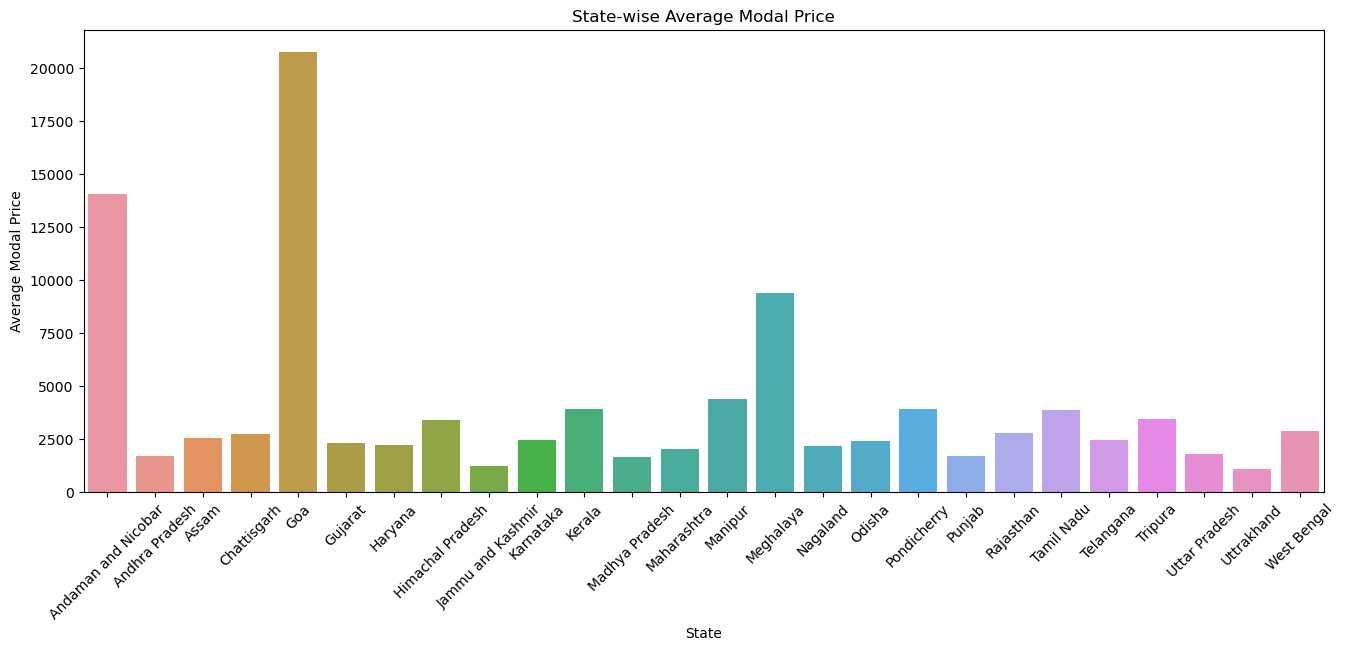

In [8]:
plt.figure(figsize=(16, 6))
sns.barplot(x='state', y='modal_price', data=state_analysis)
plt.title('State-wise Average Modal Price')
plt.xlabel('State')
plt.ylabel('Average Modal Price')
plt.xticks(rotation=45)
plt.show()

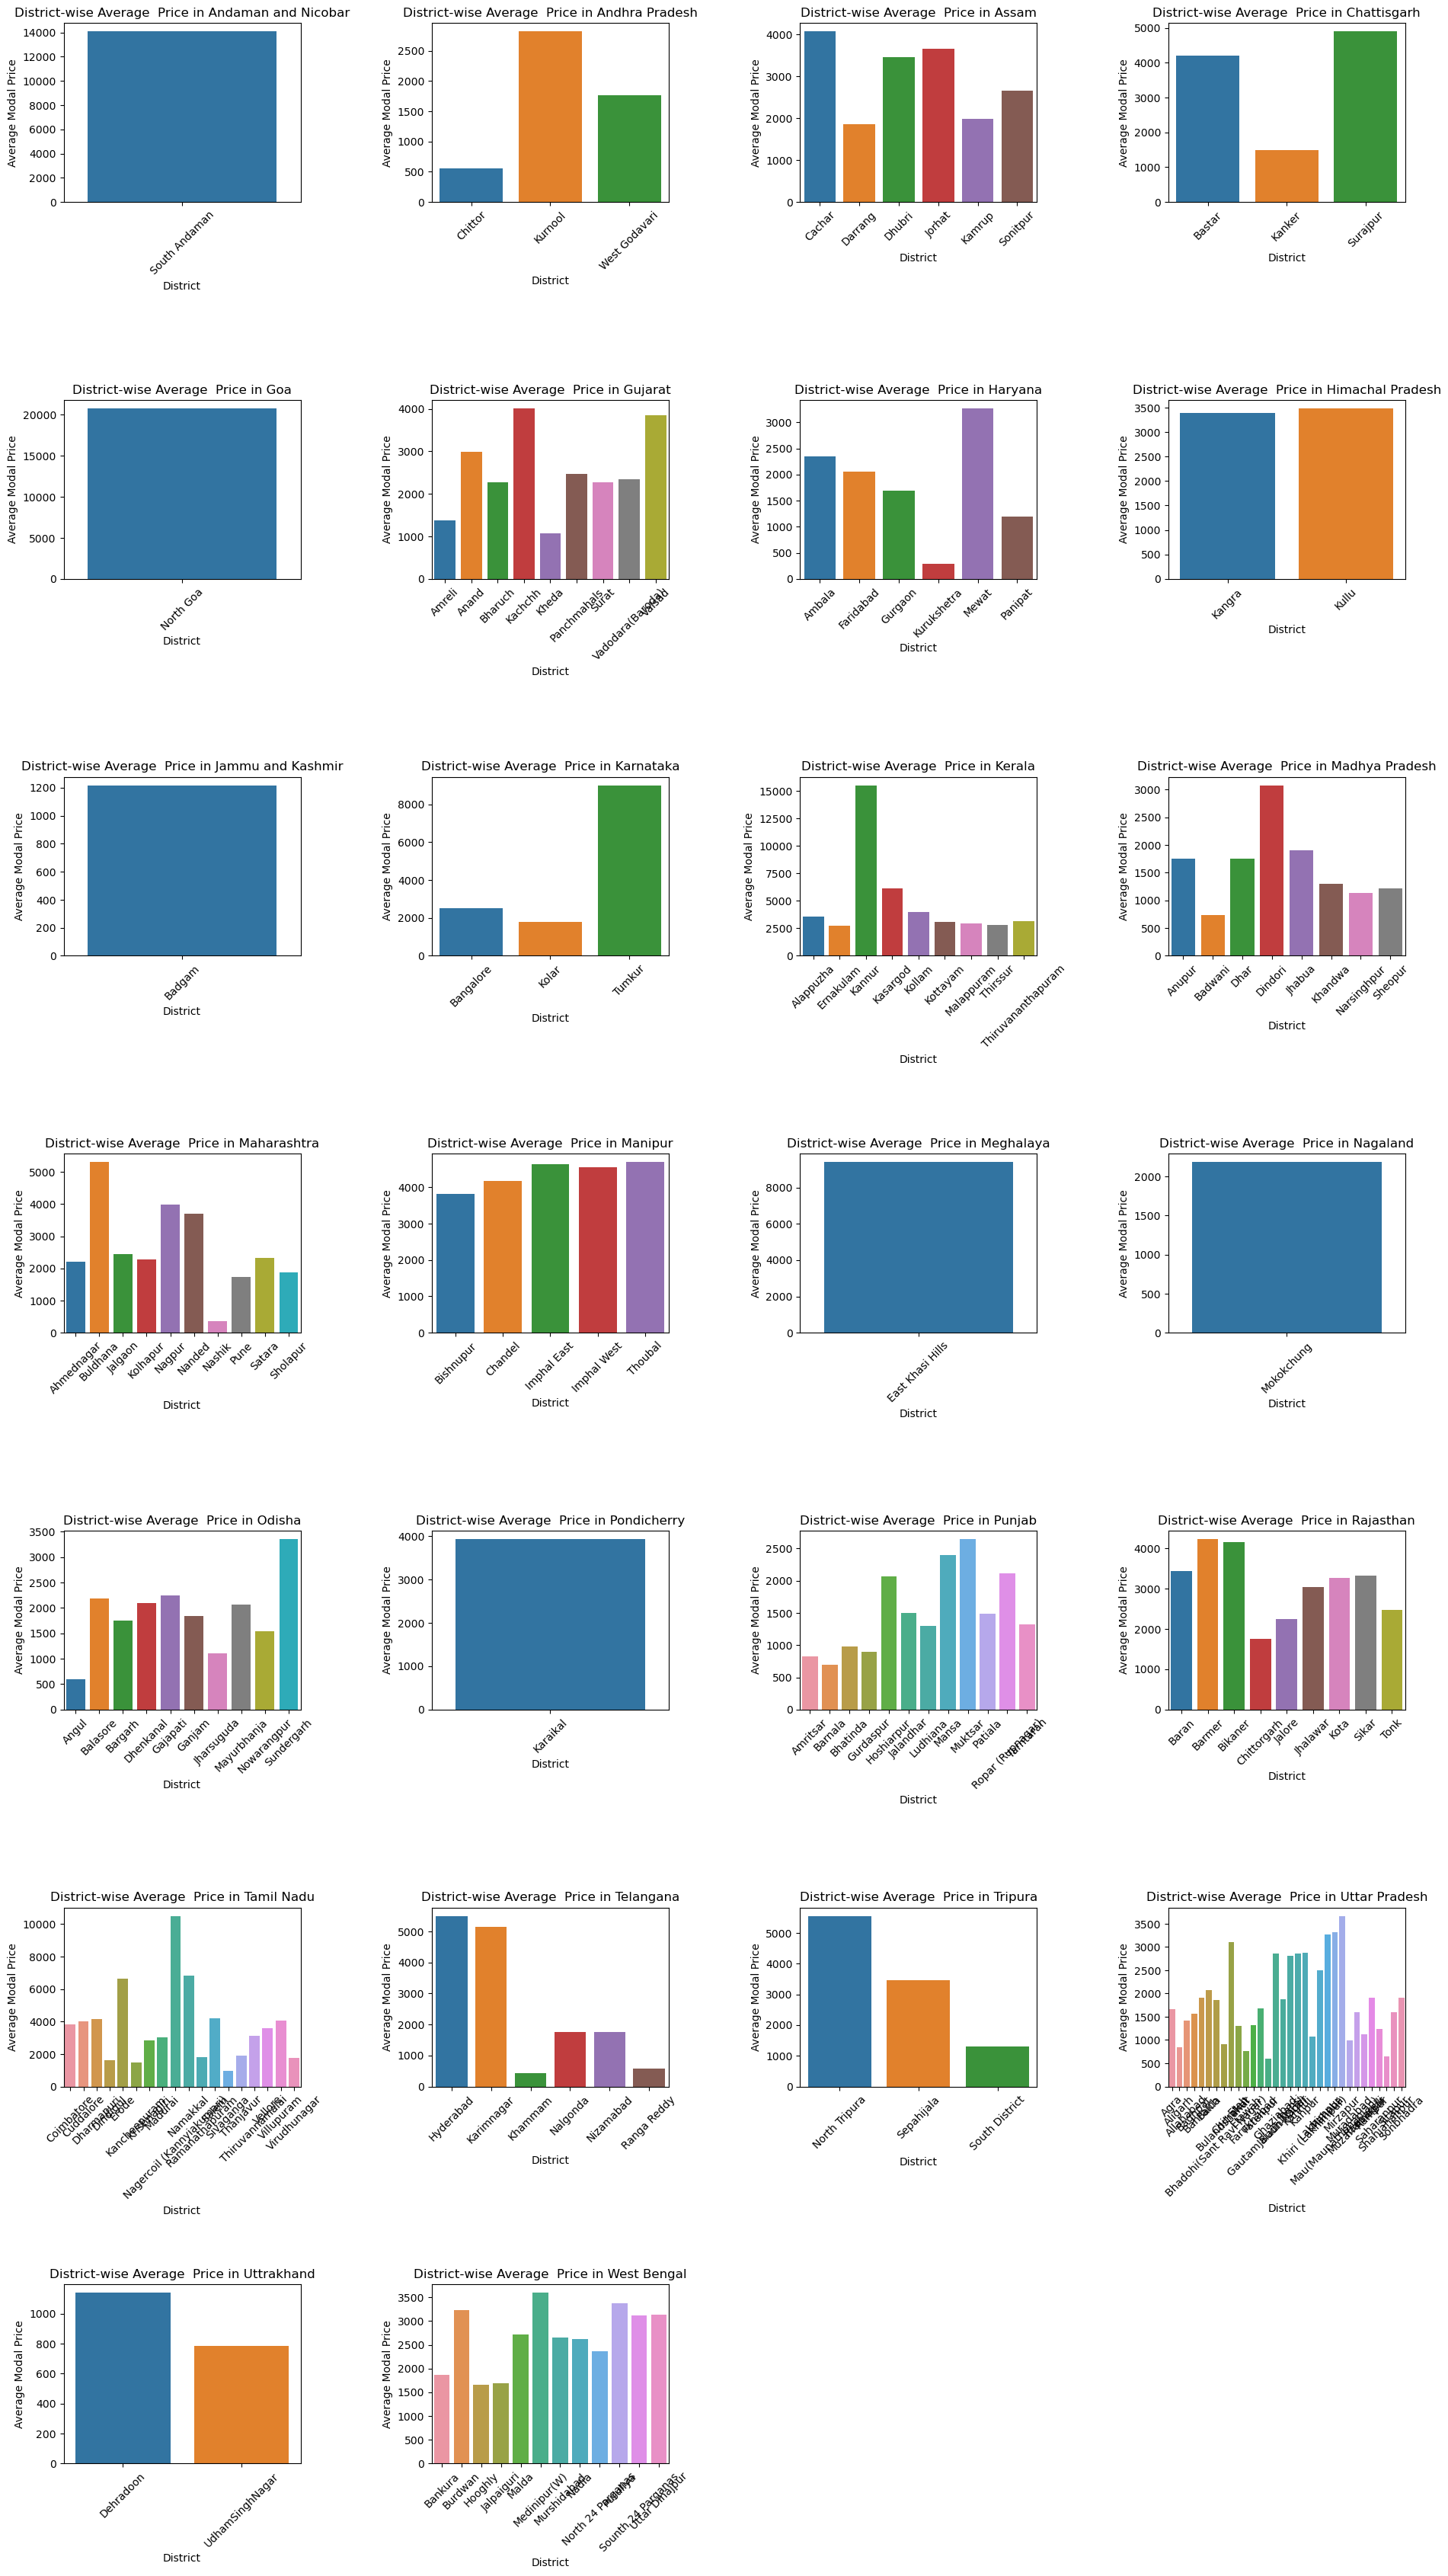

In [9]:
states = data['state'].unique()
num_states = len(states)
num_cols = 4 
num_rows = (num_states // num_cols) + (1 if num_states % num_cols != 0 else 0)
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 5 * num_rows))
axes = axes.flatten()
for i, state in enumerate(states):
    state_data = data[data['state'] == state]
    district_analysis = state_data.groupby('district').agg({
        'modal_price': 'mean'
    }).reset_index()
    sns.barplot(x='district', y='modal_price', data=district_analysis, ax=axes[i])
    axes[i].set_title(f'District-wise Average  Price in {state}')
    axes[i].set_xlabel('District')
    axes[i].set_ylabel('Average Modal Price')
    axes[i].tick_params(axis='x', rotation=45)
for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')
plt.tight_layout(pad=5.0)
plt.show()

                     commodity     min_price     max_price   modal_price
0                   Amaranthus   2666.666667   3211.111111   2916.666667
1              Amla(Nelli Kai)   3700.000000   3900.000000   3800.000000
2                  Amphophalus   2266.666667   2616.666667   2450.000000
3                        Apple   4987.031250   6099.531250   5722.968750
4    Arecanut(Betelnut/Supari)  15044.444444  16544.444444  15827.777778
..                         ...           ...           ...           ...
151                Water Melon   1060.000000   1440.000000   1260.000000
152                      Wheat   1800.000000   1909.133333   1913.400000
153                 Wheat Atta   2766.666667   3033.333333   2866.666667
154              White Pumpkin    280.000000    340.000000    310.000000
155                       Wood    329.285714    410.000000    377.857143

[156 rows x 4 columns]


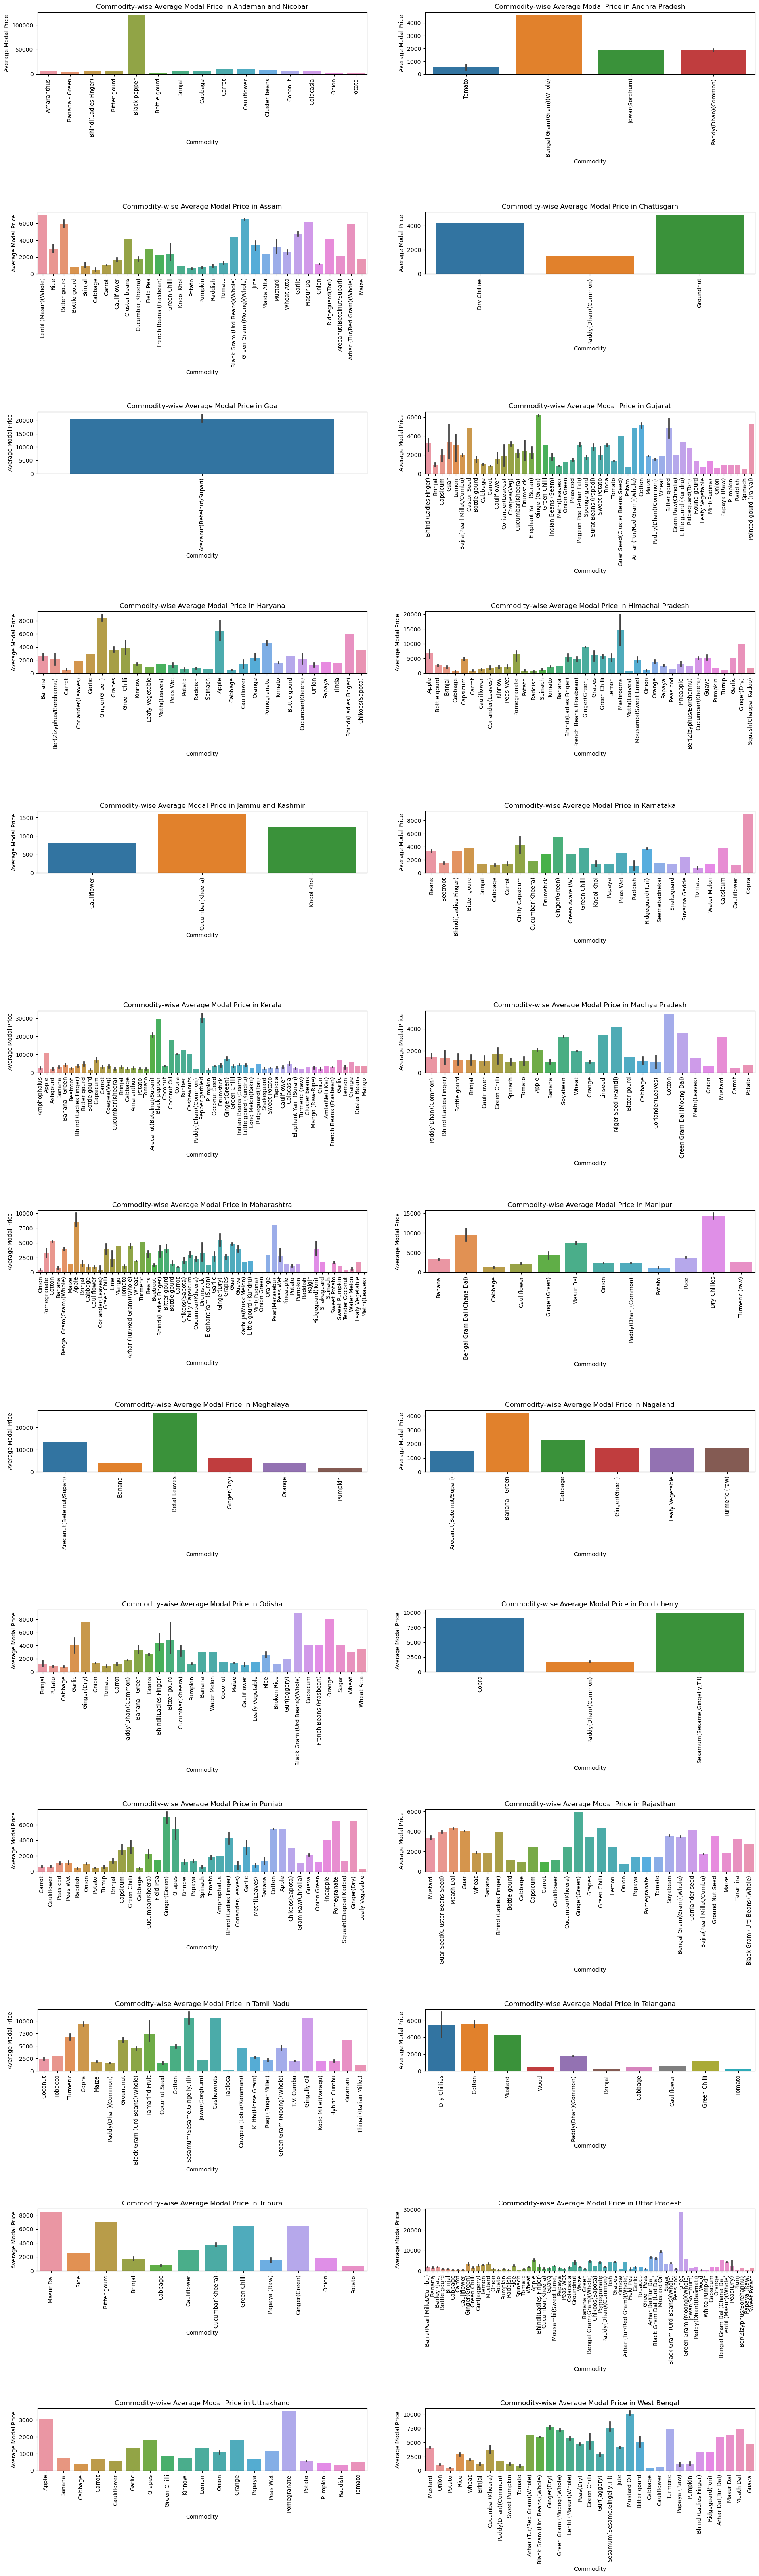

In [32]:
# Group by commodity and analyze
commodity_analysis = data.groupby('commodity').agg({
    'min_price': 'mean',  # Average min price
    'max_price': 'mean',  # Average max price
    'modal_price': 'mean'  # Average modal price
}).reset_index()

print(commodity_analysis)
states = data['state'].unique()
num_states = len(states)
num_cols = 2  
num_rows = (num_states // num_cols) + (1 if num_states % num_cols != 0 else 0)
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 5 * num_rows))
axes = axes.flatten()
for i, state in enumerate(states):
    state_data = data[data['state'] == state]
    sns.barplot(x='commodity', y='modal_price', data=state_data, ax=axes[i])
    axes[i].set_title(f'Commodity-wise Average Modal Price in {state}')
    axes[i].set_xlabel('Commodity')
    axes[i].set_ylabel('Average Modal Price')
    axes[i].tick_params(axis='x', rotation=90)
for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')
plt.tight_layout(pad=5.0)
plt.show()

     category     min_price     max_price   modal_price
0      Fruits   2818.181818   3101.363636   2962.272727
1      Grains   2258.163265   2445.265306   2407.836735
2       Other   2342.628754   2737.251108   2583.396849
3      Spices  69500.000000  79750.000000  74625.000000
4  Vegetables   3727.823529   4291.294118   4032.882353


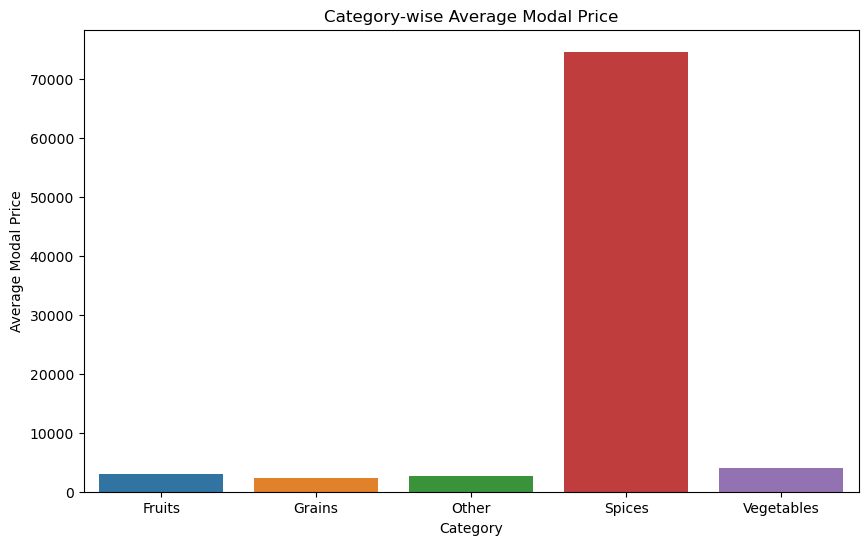

In [29]:
def categorize_commodity(commodity):
    if commodity in ['Rice', 'Wheat']:
        return 'Grains'
    elif commodity in ['Amaranthus', 'Bhindi(Ladies Finger)', 'Bitter gourd']:
        return 'Vegetables'
    elif commodity in ['Banana - Green']:
        return 'Fruits'
    elif commodity in ['Black pepper']:
        return 'Spices'
    else:
        return 'Other'
data['category'] = data['commodity'].apply(categorize_commodity)
category_analysis = data.groupby('category').agg({
    'min_price': 'mean',  
    'max_price': 'mean',  
    'modal_price': 'mean'  
}).reset_index()
print(category_analysis)
plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='modal_price', data=category_analysis)
plt.title('Category-wise Average Modal Price')
plt.xlabel('Category')
plt.ylabel('Average Modal Price')
plt.show()

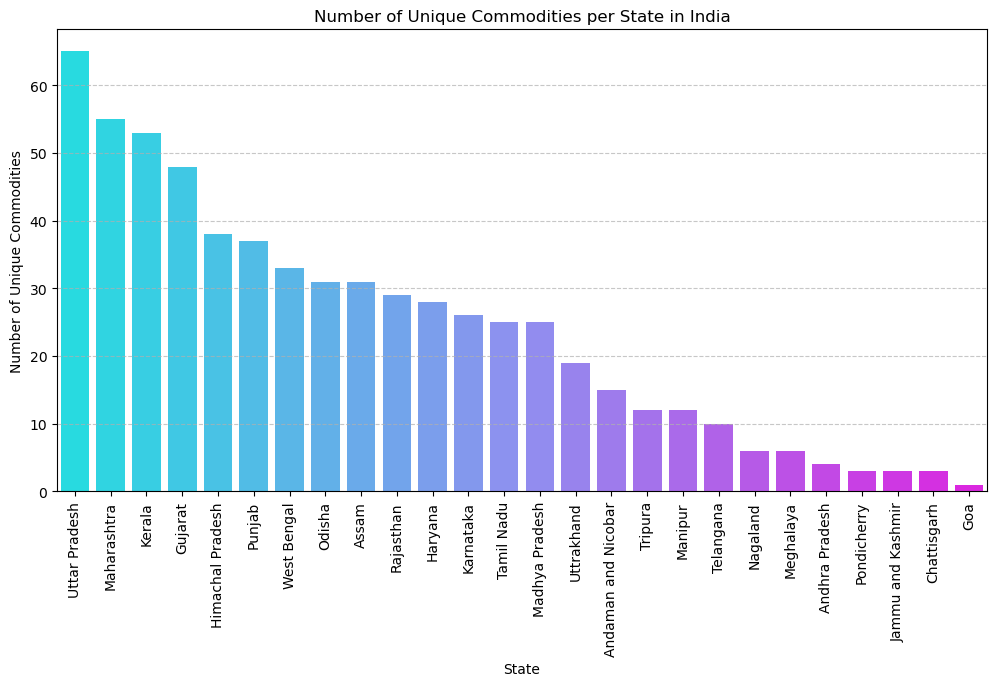

In [14]:

state_commodity_counts = data.groupby('state')['commodity'].nunique().reset_index()

# Sorting for better visualization
state_commodity_counts = state_commodity_counts.sort_values(by='commodity', ascending=False)

# Plot bar graph
plt.figure(figsize=(12, 6))
sns.barplot(x='state', y='commodity', data=state_commodity_counts, palette='cool')

# Formatting
plt.xticks(rotation=90)  # Rotate state labels for readability
plt.xlabel("State")
plt.ylabel("Number of Unique Commodities")
plt.title("Number of Unique Commodities per State in India")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

                  state   modal_price
4                   Goa  20750.000000
0   Andaman and Nicobar  14073.333333
14            Meghalaya   9391.666667
13              Manipur   4391.826923
17          Pondicherry   3928.428571
10               Kerala   3905.474453
20           Tamil Nadu   3870.142077
22              Tripura   3461.111111
7      Himachal Pradesh   3410.490196
25          West Bengal   2885.555556
19            Rajasthan   2796.512195
3           Chattisgarh   2720.000000
2                 Assam   2571.896552
9             Karnataka   2469.916667
21            Telangana   2459.000000
16               Odisha   2392.325581
5               Gujarat   2335.646018
6               Haryana   2227.707692
15             Nagaland   2183.333333
12          Maharashtra   2040.679012
23        Uttar Pradesh   1776.888502
1        Andhra Pradesh   1698.571429
18               Punjab   1698.166667
11       Madhya Pradesh   1653.750000
8     Jammu and Kashmir   1216.666667
24          

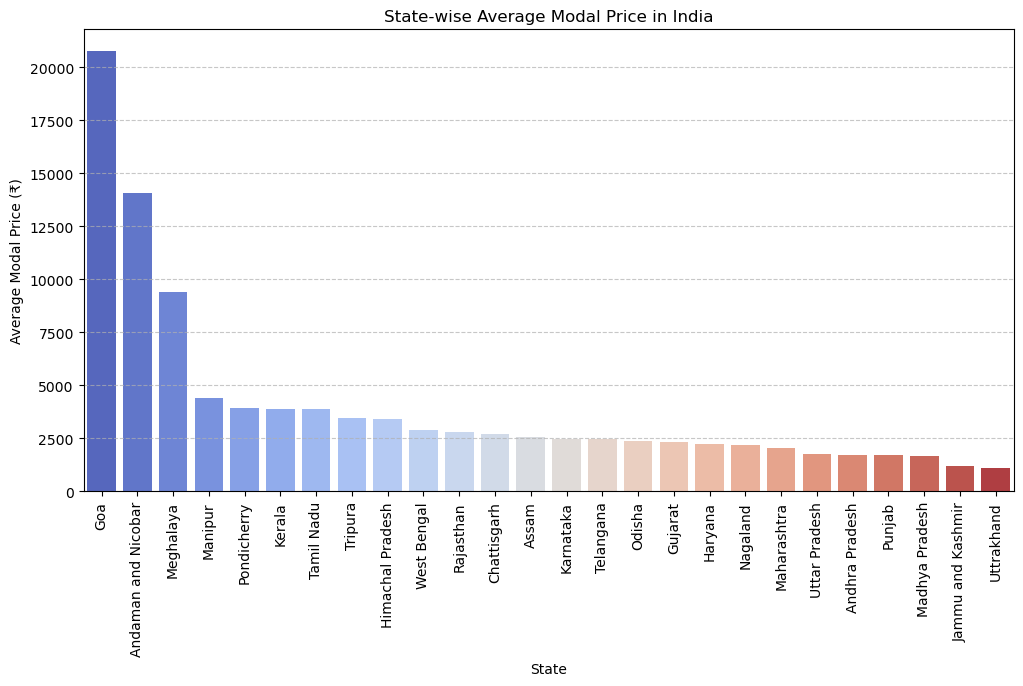

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample dataset structure (Replace with your actual dataset)
# data = pd.read_csv("your_dataset.csv")  # Uncomment to load dataset

# Group by state and calculate the average modal price
state_avg_modal_price = data.groupby('state')['modal_price'].mean().reset_index()

# Sorting for better visualization
state_avg_modal_price = state_avg_modal_price.sort_values(by='modal_price', ascending=False)

# Display the state-wise average modal prices
print(state_avg_modal_price)

# Plot bar graph
plt.figure(figsize=(12, 6))
sns.barplot(x='state', y='modal_price', data=state_avg_modal_price, palette='coolwarm')

# Formatting
plt.xticks(rotation=90)  # Rotate state labels for readability
plt.xlabel("State")
plt.ylabel("Average Modal Price (₹)")
plt.title("State-wise Average Modal Price in India")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()
